In [147]:
# Import necessary library
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
# Read .csv file and then turn into dataframe
df_air_quality = pd.read_csv("C:/Users/Admin/Desktop/DSMP/Raw data/air-quality-data-continuous.csv", sep=";")
df_EV_pop = pd.read_csv("C:/Users/Admin/Desktop/DSMP/Raw data/Bristol car sales data -EV population.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14652\657044810.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_air_quality = pd.read_csv("C:/Users/Admin/Desktop/DSMP/Raw data/air-quality-data-continuous.csv", sep=";")


In [149]:
df_EV_pop.head()

,Units,Fuel,Keepership,ONS Sort [note 6],ONS Code [note 6],ONS Geography [note 6],2022 Q3,2022 Q2,2022 Q1,2021 Q4,...,2014 Q1,2013 Q4,2013 Q3,2013 Q2,2013 Q1,2012 Q4,2012 Q3,2012 Q2,2012 Q1,2011 Q4
0,Number,Battery electric,Company,1,K02000001,United Kingdom,"351,294","314,714","283,499","241,799",...,"7,667","7,134","6,904","6,794","6,450","6,275","5,982","5,865","5,704","5,530"
1,Number,Battery electric,Company,2,K03000001,Great Britain,"346,811","310,826","280,206","239,063",...,"7,577","7,057","6,829","6,725","6,398","6,234","5,944","5,837","5,684","5,515"
2,Number,Battery electric,Company,3,E92000001,England,"325,479","291,682","262,684","223,848",...,"6,905","6,453","6,250","6,155","5,869","5,722","5,464","5,405","5,300","5,177"
3,Number,Battery electric,Company,4,E12000001,North East,"3,671","3,083","2,651","2,239",...,273,274,276,275,260,246,231,230,206,211
4,Number,Battery electric,Company,5,E06000047,County Durham,542,460,408,352,...,44,39,36,30,25,22,22,21,21,46


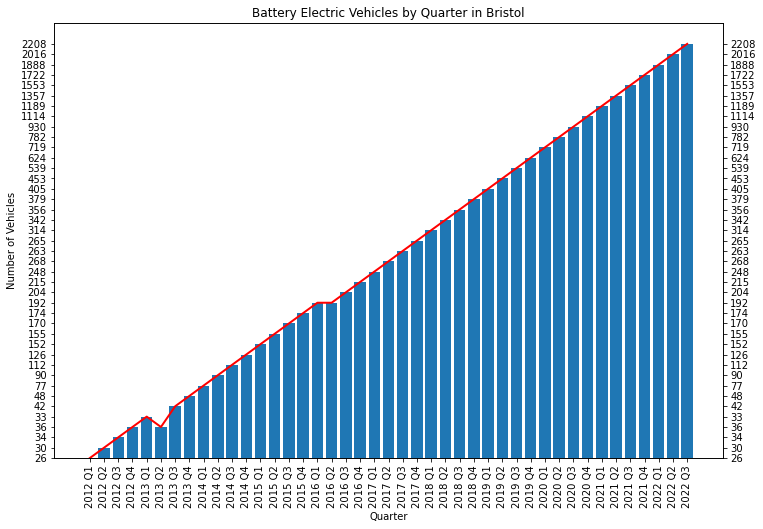

In [150]:
# Filter the data to only include rows where Fuel is 'Battery electric', ONS Geography is 'Bristol, City of', and Keepership is 'Total'
battery_electric = df_EV_pop[(df_EV_pop['Fuel'] == 'Battery electric') & 
                             (df_EV_pop['ONS Geography [note 6]'] == '   Bristol, City of') & 
                             (df_EV_pop['Keepership'] == 'Total')]

# remove commas from the numbers
battery_electric = battery_electric.replace(',', '', regex=True)

# Create a list of the quarters in the data set
quarters = ['2012 Q1', '2012 Q2', '2012 Q3', '2012 Q4', '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4', '2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1', '2015 Q2', '2015 Q3', '2015 Q4', '2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4', '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4', '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2', '2022 Q3']

# Create a list of the corresponding values for each quarter in the Battery electric data set
values = battery_electric[quarters].values.tolist()[0]

# Create a bar chart using matplotlib
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(quarters, values)

# Set the title and labels for the chart
ax.set_title('Battery Electric Vehicles by Quarter in Bristol')
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Vehicles')
plt.xticks(rotation=90)

# Create the line graph on the secondary y-axis
ax2 = ax.twinx()
ax2.plot(quarters, values, color='red', linewidth=2)
ax2.set_ylim(bottom=0)

# Display the chart
plt.show()

In [151]:
df_air_quality.head()

,Date Time,NOx,NO2,NO,SiteID,PM10,NVPM10,VPM10,NVPM2.5,PM2.5,...,SO2,Temperature,RH,Air Pressure,Location,geo_point_2d,DateStart,DateEnd,Current,Instrument Type
0,2019-04-29T23:00:00+00:00,122.25,49.25,47.75,501,30.400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
1,2019-04-30T03:00:00+00:00,42.25,35.25,4.50,501,20.275,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
2,2019-05-01T06:00:00+00:00,82.00,48.50,21.75,501,28.125,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
3,2019-05-01T18:00:00+00:00,357.25,117.75,156.50,501,27.700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
4,2019-05-02T14:00:00+00:00,194.50,73.25,79.25,501,23.775,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)


In [152]:
# Check null data
df_air_quality.info()
print(df_air_quality['NOx'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545432 entries, 0 to 1545431
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Date Time        1545425 non-null  object 
 1   NOx              1410954 non-null  float64
 2   NO2              1408172 non-null  float64
 3   NO               1417289 non-null  float64
 4   SiteID           1545432 non-null  int64  
 5   PM10             342257 non-null   float64
 6   NVPM10           88165 non-null    float64
 7   VPM10            88158 non-null    float64
 8   NVPM2.5          71978 non-null    float64
 9   PM2.5            138205 non-null   float64
 10  VPM2.5           71978 non-null    float64
 11  CO               195930 non-null   float64
 12  O3               258516 non-null   float64
 13  SO2              156179 non-null   float64
 14  Temperature      104430 non-null   float64
 15  RH               27807 non-null    float64
 16  Air Pressure     0

In [153]:
# Drop NOx NaN data
df_air_quality.dropna(subset=['NOx'], inplace=True)
print("The null data of NOx column is", df_air_quality['NOx'].isnull().sum())
df_air_quality.info()

The null data of NOx column is 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410954 entries, 0 to 1545431
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Date Time        1410948 non-null  object 
 1   NOx              1410954 non-null  float64
 2   NO2              1407669 non-null  float64
 3   NO               1407668 non-null  float64
 4   SiteID           1410954 non-null  int64  
 5   PM10             326592 non-null   float64
 6   NVPM10           86379 non-null    float64
 7   VPM10            86372 non-null    float64
 8   NVPM2.5          70718 non-null    float64
 9   PM2.5            135667 non-null   float64
 10  VPM2.5           70718 non-null    float64
 11  CO               187618 non-null   float64
 12  O3               238272 non-null   float64
 13  SO2              151309 non-null   float64
 14  Temperature      100066 non-null   float64
 15  RH               27572 non-null  

In [154]:
# Convert 'Date Time' to datetime data type
df_air_quality['Date Time'] = pd.to_datetime(df_air_quality['Date Time'])

# Set 'Date Time' as the index
df_air_quality.set_index('Date Time', inplace=True)

In [155]:
pd.DataFrame(df_air_quality)

,NOx,NO2,NO,SiteID,PM10,NVPM10,VPM10,NVPM2.5,PM2.5,VPM2.5,...,SO2,Temperature,RH,Air Pressure,Location,geo_point_2d,DateStart,DateEnd,Current,Instrument Type
Date Time,,,,,,,,,,,,,,,,,,,,,
2019-04-29 23:00:00+00:00,122.250000,49.250000,47.750000,501,30.400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
2019-04-30 03:00:00+00:00,42.250000,35.250000,4.500000,501,20.275,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
2019-05-01 06:00:00+00:00,82.000000,48.500000,21.750000,501,28.125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
2019-05-01 18:00:00+00:00,357.250000,117.750000,156.500000,501,27.700,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
2019-05-02 14:00:00+00:00,194.500000,73.250000,79.250000,501,23.775,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 15:00:00+00:00,170.341063,64.136752,69.249028,501,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Colston Avenue,"51.455269382758324, -2.596648828557916",2018-11-30T00:00:00+00:00,NaN,True,Continuous (Reference)
2023-02-08 15:00:00+00:00,61.658469,34.494062,17.648860,672,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Marlborough Street,"51.45914197176008, -2.595432718360466",2021-07-01T00:00:00+00:00,NaN,True,Continuous (Reference)
2023-02-08 13:00:00+00:00,115.663221,48.252907,43.847985,215,NaN,NaN,NaN,NaN,28.000001,NaN,...,NaN,5.9,24.0,NaN,Parson Street School,"51.43267570732794, -2.604956656683554",2002-02-01T00:00:00+00:00,NaN,True,Continuous (Reference)


In [156]:
# Resample the data to quarterly frequency and calculate the mean of NOx for each quarter
df_quarterly = df_air_quality['NOx'].resample('Q').mean()

# Convert the DatetimeIndex to a PeriodIndex and rename it to show the year and quarter
df_quarterly.index = df_quarterly.index.to_period('Q').strftime('%Y Q%q')

# Print the quarterly mean of NOx
pd.DataFrame(df_quarterly)

c:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,NOx
Date Time,
1993 Q1,139.386893
1993 Q2,92.631019
1993 Q3,NaN
1993 Q4,178.287089
1994 Q1,128.009255
...,...
2022 Q1,84.347024
2022 Q2,52.128417
2022 Q3,53.377740


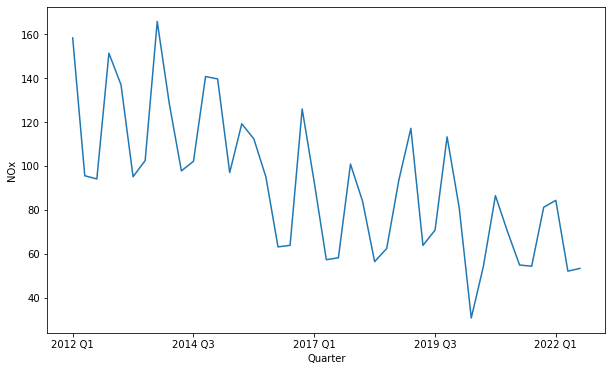

In [157]:
# Create a line graph of NOx in Bristol from 2012 Q1 to 2022 Q3
df_quarterly['2012 Q1':'2022 Q3'].plot(kind='line', xlabel='Quarter', ylabel='NOx', figsize=(10,6))

# Display the graph
plt.show()

In [158]:
df_battery_electric = pd.DataFrame(list(zip(quarters, values)), columns=['Quarters', 'Number of Vehicles'])
pd.DataFrame(df_battery_electric)
df_battery_electric['Number of Vehicles'] = df_battery_electric['Number of Vehicles'].str.replace(',', '.').astype('float64')


In [159]:
pd.DataFrame(df_battery_electric)
df_battery_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quarters            43 non-null     object 
 1   Number of Vehicles  43 non-null     float64
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes


In [160]:
# Merge the two dataframes on the quarter column
merged_df = pd.merge(df_battery_electric, df_quarterly, left_on='Quarters', right_index=True)

pd.DataFrame(merged_df)

,Quarters,Number of Vehicles,NOx
0,2012 Q1,26.0,158.264644
1,2012 Q2,30.0,95.533203
2,2012 Q3,34.0,94.081366
3,2012 Q4,36.0,151.293686
4,2013 Q1,33.0,136.949181
5,2013 Q2,36.0,95.084878
6,2013 Q3,42.0,102.460205
7,2013 Q4,48.0,165.741973
8,2014 Q1,77.0,128.316680
9,2014 Q2,90.0,97.749837


In [161]:
correlation = merged_df['Number of Vehicles'].corr(merged_df['NOx'])

print("Correlation between Number of Vehicles and NOx:", correlation)

Correlation between Number of Vehicles and NOx: -0.5358388256012585


The negative correlation coefficient of -0.5358 suggests that there is a moderate negative relationship between the Number of Vehicles and NOx (nitrogen oxides) emissions. This means that as the number of vehicles increases, the NOx emissions decrease and vice versa. However, it is important to note that correlation does not imply causation, and there may be other factors that influence NOx emissions.

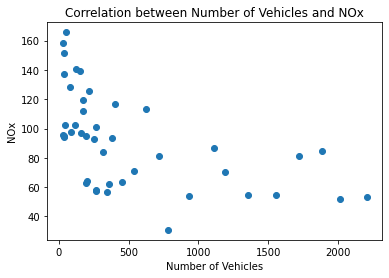

In [163]:
# Create the scatter plot
plt.scatter(merged_df['Number of Vehicles'], merged_df['NOx'])
plt.title('Correlation between Number of Vehicles and NOx')
plt.xlabel('Number of Vehicles')
plt.ylabel('NOx')
plt.show()

In [165]:
from scipy.stats import linregress

x = merged_df['Number of Vehicles']
y = merged_df['NOx']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

Slope: -0.028978095000473093
Intercept: 106.91346500863773
R-squared: 0.287123247021736


Slope: The slope of the line (also known as the regression coefficient) represents the rate of change of NOx with respect to the number of vehicles. A negative slope of -0.02898 suggests that as the number of vehicles increases by one unit, the NOx decreases by approximately 0.029 units.

Intercept: The intercept represents the value of NOx when the number of vehicles is zero. In this case, the intercept is 106.913, which means that if there were no vehicles, the NOx would still be at a level of approximately 107 units.

R-squared: The R-squared value measures how well the regression line fits the data. It represents the proportion of the variation in the dependent variable (NOx) that is explained by the independent variable (number of vehicles). An R-squared value of 0.2871 indicates that approximately 28.71% of the variation in NOx can be explained by the number of vehicles. The remaining 71.29% of the variation is attributed to other factors not included in the model.

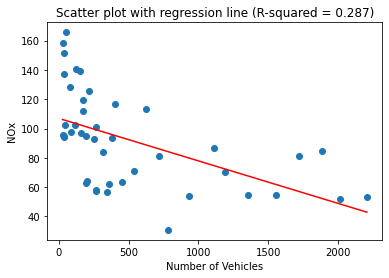

In [166]:
from sklearn.linear_model import LinearRegression

# create scatter plot
plt.scatter(merged_df['Number of Vehicles'], merged_df['NOx'])

# fit linear regression
X = merged_df[['Number of Vehicles']]
y = merged_df['NOx']
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# create line plot
x_range = np.linspace(X.min(), X.max(), num=100)
y_range = slope * x_range + intercept
plt.plot(x_range, y_range, color='red')

# add labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('NOx')
plt.title('Scatter plot with regression line (R-squared = {:.3f})'.format(r_sq))

# show plot
plt.show()

R-squared value of 0.287 means that approximately 28.7% of the variance in NOx can be explained by the Number of Vehicles. This indicates that the regression model may not fully capture all the factors that affect NOx emissions and that there may be other variables that need to be considered in the analysis.

R-squared: 0.39815647959970546


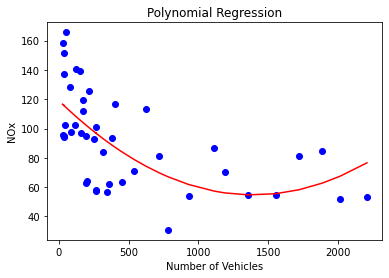

In [167]:
from sklearn.preprocessing import PolynomialFeatures

# extract variables
x = merged_df["Number of Vehicles"].values.reshape(-1, 1)
y = merged_df["NOx"].values.reshape(-1, 1)

# fit polynomial regression model
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

# predict y values using fitted model
y_pred = poly_reg.predict(x_poly)

# calculate R-squared
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared:", r_squared)

# plot scatter plot and polynomial curve
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title("Polynomial Regression")
plt.xlabel("Number of Vehicles")
plt.ylabel("NOx")
plt.show()